<a href="https://colab.research.google.com/github/AtharvaGh/StartingOne/blob/main/DL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install -U keras-Tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
%tensorflow_version 2.0
import tensorflow as tf
device_name =tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU not found')
print('Found GPU at:{}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at:/device:GPU:0


In [37]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import pandas as pd
import numpy as np
from scipy import stats
from tensorflow import keras
from keras import layers
import seaborn as sns
import matplotlib.pyplot as plt
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,ReLU,LeakyReLU

In [39]:
def load_data(path):
  auto = pd.read_csv(path)
  print("Rows:",auto.shape[0],"Columns:",auto.shape[1])
  return(auto)
home_df = load_data("/content/drive/MyDrive/Datasets/data.csv")
home_df.iloc[3840:3850,:]

Rows: 4600 Columns: 17


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3840,720000.0,4,3.00,3550,12327,1.5,0,0,4,2180,1370,1990,0,17325 102nd Ave NE,Bothell,WA 98011,USA
3841,256000.0,4,2.50,2050,5787,2.0,0,0,3,2050,0,2002,0,1327 S 277th Pl,Des Moines,WA 98198,USA
3842,255000.0,4,2.25,1680,3179,2.0,0,0,3,1680,0,2002,0,11631 SE 308th Pl,Auburn,WA 98092,USA
3843,540000.0,3,2.25,1320,1800,2.0,0,0,3,1320,0,1994,0,3404 E Cherry St,Seattle,WA 98122,USA
3844,481015.0,3,2.25,1550,5511,2.0,0,0,3,1550,0,1987,2000,10600-10650 117th Pl NE,Kirkland,WA 98033,USA
3845,575000.0,3,1.75,2680,8625,1.0,0,0,5,1590,1090,1974,0,100 Mt Si Pl NW,Issaquah,WA 98027,USA
3846,339950.0,3,2.50,2390,34041,1.0,0,0,3,1840,550,1984,0,27622 195th Ave SE,Kent,WA 98042,USA
3847,475000.0,4,2.50,2040,7260,2.0,0,0,4,2040,0,1963,0,15320 Corliss Pl N,Shoreline,WA 98133,USA
3848,732000.0,3,3.75,2670,6517,2.5,0,4,4,2020,650,1977,0,3741 Belvidere Ave SW,Seattle,WA 98126,USA
3849,860000.0,4,1.75,1880,3720,1.5,0,0,4,1880,0,1924,0,15 Raye St,Seattle,WA 98109,USA


In [40]:
home_df.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,335000.0,2,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,482000.0,4,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,452500.0,3,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,640000.0,4,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [41]:
home_df.shape

(4600, 17)

In [42]:
home_df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [43]:
z = np.where(home_df['price'] == 0.0)
home_df.drop(z[0],axis=0,inplace=True)

In [44]:
home_df['city'].value_counts()

Seattle                1561
Renton                  291
Bellevue                281
Redmond                 235
Kirkland                187
Issaquah                186
Kent                    184
Auburn                  175
Sammamish               171
Federal Way             145
Shoreline               123
Woodinville             114
Maple Valley             95
Mercer Island            82
Burien                   72
Snoqualmie               69
Kenmore                  65
Des Moines               58
North Bend               50
Duvall                   42
Covington                42
Lake Forest Park         34
Bothell                  33
Newcastle                33
Tukwila                  29
Vashon                   29
SeaTac                   28
Enumclaw                 27
Carnation                22
Normandy Park            17
Fall City                11
Medina                   11
Clyde Hill                9
Black Diamond             8
Ravensdale                7
Pacific             

In [45]:
#As USA  is the only datapoint in the column we can remove country column
home_df.drop(columns='country',axis=1,inplace=True)

In [46]:
home_df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


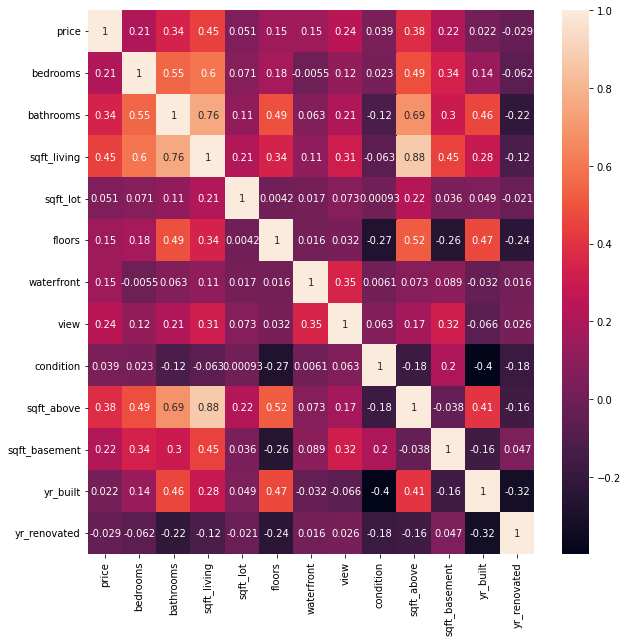

In [47]:
plt.figure(figsize=(10,10))
home_corr = home_df.corr()
sns.heatmap(home_corr,annot=True)

price has decent corelation between sqrt_living and sqft_above

bedrooms has decent corelation with bathrooms,sqft_living and sqft_above

bathroom has a very high corelation with sqft_living and sqft_above



In [48]:
bins = [1900,1930,1960,1990,2020]
home_df['yr_built_range'] = pd.cut(home_df['yr_built'],bins)

## Outlier Detection

In [49]:
#def z_score(df,columns):
#  for c in columns:
#    z = np.abs(stats.zscore(df[c]))
#    outliers = np.where(z>3)
#    df.drop(outliers[0],axis=0,inplace = True)
#    print("Outliers for ",c,outliers[0],"have been removed")
#  return(df)
#columns = home_df.select_dtypes(include=[np.number]).columns
#home_df = z_score(home_df,columns)

In [50]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()
home_df['yr_built_range']= l_en.fit_transform(home_df['yr_built_range'])
home_df.head(5)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,yr_built_range
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,1
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,0
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,2
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,2
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,2


In [51]:
yr = home_df.pop('yr_built_range')
home_df.insert(11,'yr_built_range',yr)

In [52]:
X = home_df.iloc[:,1:12]
Y = home_df.iloc[:,0]

In [76]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built_range'],
      dtype='object')

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=5)

In [54]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((3185, 11), (3185,), (1366, 11), (1366,))

In [55]:
#X_train = X_train.values.reshape(-1,1)
#Y_test = Y_test.values.reshape(-1,1)
#Y_train = Y_train.values.reshape(-1,1)
#X_test = X_test.values.reshape(-1,1)

In [56]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler().fit(X_train)

X_train_n = norm.transform(X_train)
X_test_n = norm.transform(X_test)

Y_train_n = norm.fit_transform(Y_train.values.reshape(-1,1))
Y_test_n = norm.transform(Y_test.values.reshape(-1,1))

In [57]:
def build_model(hp):
  model = keras.Sequential()
  for i in range(hp.Int('num_layers',2,20)):
    model.add(layers.Dense(units=hp.Int('unit_'+str(i),min_value=32,max_value=512,step=32),activation='relu'))
    model.add(layers.Dense(1,activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),loss='mean_absolute_error',metrics=['mean_absolute_error'])
  return model

In [58]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,executions_per_trial=3,directory='project2',project_name='House ')

INFO:tensorflow:Reloading Oracle from existing project project2/House /oracle.json
INFO:tensorflow:Reloading Tuner from project2/House /tuner0.json


In [59]:
tuner.search_space_summary()

Search space summary
Default search space size: 21
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
unit_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
unit_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
unit_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
unit_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
unit_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
unit_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
unit_6 (Int)
{'default': None, 'condition

In [60]:
tuner.search(X_train_n,Y_train_n,epochs=5,validation_data=(X_test_n,Y_test_n))

INFO:tensorflow:Oracle triggered exit


In [61]:
tuner.results_summary()

Results summary
Results in project2/House 
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 8
unit_0: 96
learning_rate: 0.01
unit_1: 32
unit_2: 384
unit_3: 448
unit_4: 480
unit_5: 448
unit_6: 32
unit_7: 32
Score: 0.41187750299771625
Trial summary
Hyperparameters:
num_layers: 6
unit_0: 480
learning_rate: 0.001
unit_1: 256
unit_2: 32
unit_3: 32
unit_4: 32
unit_5: 32
Score: 0.4490087628364563
Trial summary
Hyperparameters:
num_layers: 12
unit_0: 224
learning_rate: 0.0001
unit_1: 288
unit_2: 320
unit_3: 256
unit_4: 320
unit_5: 480
unit_6: 256
unit_7: 288
unit_8: 288
unit_9: 64
unit_10: 480
unit_11: 416
unit_12: 288
unit_13: 32
unit_14: 448
unit_15: 480
unit_16: 352
unit_17: 416
unit_18: 288
Score: 0.5413251916567484
Trial summary
Hyperparameters:
num_layers: 19
unit_0: 416
learning_rate: 0.0001
unit_1: 352
unit_2: 448
unit_3: 128
unit_4: 64
unit_5: 448
unit_6: 384
unit_7: 224
unit_8: 512
unit_9: 64
unit_10: 64
unit_11: 128
unit_12: 192
unit_13: 480
unit_14: 160
unit_15: 44

In [62]:
model = Sequential()
model.add(Dense(32,input_dim=11,activation='relu'))
#model.add(Dense(480,input_dim=512,activation='relu'))
#model.add(Dense(224,input_dim=512,activation='relu'))
#model.add(Dense(192,input_dim=512,activation='relu'))
#model.add(Dense(352,input_dim=512,activation='relu'))
#model.add(Dense(416,input_dim=512,activation='relu'))
#model.add(Dense(224,input_dim=512,activation='relu'))
#model.add(Dense(288,input_dim=512,activation='relu'))
#model.add(Dense(384,input_dim=512,activation='relu'))
model.add(Dense(96,activation='linear'))

In [72]:
model.compile(loss='mean_absolute_error',optimizer = keras.optimizers.Adam(learning_rate = 1e-2),metrics=['mean_absolute_error'])

In [73]:
model.fit(X_train_n,Y_train_n,epochs=5)

Epoch 1/5
100/100 [==============================] - 1s 2ms/step - loss: 0.3626 - mean_absolute_error: 0.3626
Epoch 2/5
100/100 [==============================] - 0s 3ms/step - loss: 0.3606 - mean_absolute_error: 0.3606
Epoch 3/5
100/100 [==============================] - 0s 3ms/step - loss: 0.3560 - mean_absolute_error: 0.3560
Epoch 4/5
100/100 [==============================] - 0s 2ms/step - loss: 0.3565 - mean_absolute_error: 0.3565
Epoch 5/5
100/100 [==============================] - 0s 2ms/step - loss: 0.3574 - mean_absolute_error: 0.3574


In [74]:
y_pred = model.predict(X_test_n)

In [75]:
l,met = model.evaluate(X_test_n,Y_test_n,verbose=1)
print('Model loss : %.2f' %((l * 100)))

43/43 [==============================] - 0s 2ms/step - loss: 0.4065 - mean_absolute_error: 0.4065
Model loss : 40.65
